# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# customized settings for seaborn
sns.set_theme(style = "whitegrid", font_scale = 2 )


## Data Acquisition 


In [2]:
#import the dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


It is clear that the dataframe has no header so we shall adjust it. The names of the columns are contained in the data folder and we copy them here for sake of clearness. 

>| Descriptor | Values | 
>| ----------------- | ------- |
>|age| continuous| 
|workclass| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked|
|fnlwgt| continuous|
|education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool|
|education-num| continuous|
|marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
|occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried|
|race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
|sex| Female, Male|
|capital-gain| continuous|
|capital-loss| continuous|
|hours-per-week| continuous|
|native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|


Let's change the column labels for sake of clearness.

In [3]:
header = ["age", "workclass", "fnlwgt", "education", "educ-num", "marital-stat", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv(url, header = None)
df.columns = header
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-stat,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#check number of rows and columns
df.shape

(32561, 15)

### Fetch Missing Values 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   educ-num        32561 non-null  int64 
 5   marital-stat    32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From this table we deduce at first that the variables in the column have the correct dtype and then that apparently there are no missing values. However, sometimes the NaN values are replaced with other special characters so let us check the unique values in the various columns.

In [6]:
for column in list(df.columns):
    print("==================================================")
    print(f"""{column}: 
    \n{df[column].unique()}""")
    print()
    

age: 
    
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

workclass: 
    
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt: 
    
[ 77516  83311 215646 ...  34066  84661 257302]

education: 
    
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

educ-num: 
    
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-stat: 
    
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation: 
    
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' T

We then have missing values only in three columns: workclass, occupation and native-country. Let us replace them with a Nan value. 

In [7]:
# replace "?" to Not a Number
df.replace(to_replace = r" ?", value = np.NaN , inplace = True)

The missing values have been succesfully replaced. Let's now move to detect them all.

In [8]:
missing_data = df.isnull() #replace data with True is Nan and False if otherwise
for column in missing_data.columns.values.tolist():
    print(f"Column: {column}" )
    print (missing_data[column].value_counts())
    print("----------------------------------")

Column: age
False    32561
Name: age, dtype: int64
----------------------------------
Column: workclass
False    30725
True      1836
Name: workclass, dtype: int64
----------------------------------
Column: fnlwgt
False    32561
Name: fnlwgt, dtype: int64
----------------------------------
Column: education
False    32561
Name: education, dtype: int64
----------------------------------
Column: educ-num
False    32561
Name: educ-num, dtype: int64
----------------------------------
Column: marital-stat
False    32561
Name: marital-stat, dtype: int64
----------------------------------
Column: occupation
False    30718
True      1843
Name: occupation, dtype: int64
----------------------------------
Column: relationship
False    32561
Name: relationship, dtype: int64
----------------------------------
Column: race
False    32561
Name: race, dtype: int64
----------------------------------
Column: sex
False    32561
Name: sex, dtype: int64
----------------------------------
Column: capital-ga

For sake of curiosity, let us determine how many rows are affected by a missing value.


In [9]:
bad_rows = missing_data[missing_data.any(1)]
bad_rows_num = bad_rows.shape[0]
print(f"Number of rows with a missing value: {bad_rows_num}")

Number of rows with a missing value: 2399


In [10]:
total_rows = df.shape[0]
percentage = round(bad_rows_num*100/total_rows,2)
print(f"Percentage of rows with a missing value: {percentage} %")

Percentage of rows with a missing value: 7.37 %


### Save the dataframe

At the end of this preliminary data cleaning we shall save the dataframe to make it more easibly accessible to the other jupyter notebook.

In [11]:
df.to_csv("uci_adult.csv", sep = "|")


## Explorative Data Analysis 


### Categorical Column Analysis

First of all, let us determine the categorical columns. 

In [12]:
cat_columns = df.select_dtypes(include = "object").columns.to_list()
print(cat_columns)

['workclass', 'education', 'marital-stat', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


Note that in this list we also have the column "income" which is our target variable. Let us first create some code to plot countplots of the categorical variables together with their scomposition in terms of income to determine possible correlations and/or hidden patterns. 

In [13]:
# function to investigate the categorical columns
def my_countplot(variable, order_list = None, rotate = True):
    
        df.dropna(subset = [variable], inplace = True)
    
        #settings
        fig = plt.figure(figsize=(30,10))

        
        #----------------------------------------------------------------
        ax1 = plt.subplot(1,2,1)
        ax1.set_title('Absolute number of people for any category')
        
        # recode strategy to transform a barplot into a countplot
        df["income-new"] = 1
        df["rich"] = df["income"].apply(lambda x : 1 if x== " >50K" else 0)
        
        # transform the dataframe for plotting
        new_df = df.groupby(variable)['income-new'].sum().reset_index()
        
        # if the order of the bins is not a priori fixed, I need to impose it or the two sns barplot might be created with different label ordering
        if order_list is None:
            order_list = list(new_df[variable])
            
        # top bars (it's the total, but once I plot upon the others this is what remains - namely the group of "income <=50K")
        sns.barplot(x=variable,  y="income-new", data= new_df, color='royalblue', order = order_list)
        
        # bottom bars (group of "income >50K")
        sns.barplot(x=variable, y="income-new", data= df[df["income"] == " >50K"], estimator=sum, ci=None,  color='darkorange', order = order_list)
           
        if rotate:
            plt.xticks(rotation = 45, ha = 'right') 
        
        # add legend
        top_bar = mpatches.Patch(color='royalblue', label='<= 50K')
        bottom_bar = mpatches.Patch(color='darkorange', label='>50K')
        plt.legend(handles=[top_bar, bottom_bar])
        
        
        #-----------------------------------------------------------------
        ax2 = plt.subplot(1,2,2)
        ax2.set_title('Relative composition of any category')
               
        # sns.countplot(x=variable, data = df, hue = "income", order = order_list)
        # if rotate:
        #     plt.xticks(rotation = 45, ha = 'right')
        # plt.legend(loc="upper right")
        
        # recode strategy to transform a barplot into a countplot
        df["income-new"] = 1
        
        # transform the dataframe for plotting
        new_df = df.groupby(variable)['income-new'].sum().reset_index()
        # new_df['income-new'] = [i / j * 100 for i,j in zip(new_df['income-new'], new_df['income-new'])]
        new_df['perc_total'] = [i / j * 100 for i,j in zip(new_df['income-new'], new_df['income-new'])]
        
        
        new_df2 = df.groupby(variable)['rich'].sum().reset_index()
        new_df2['perc_rich'] = [i / j * 100 for i,j in zip(new_df2['rich'], new_df['income-new'])]
        
        # if the order of the bins is not a priori fixed, I need to impose it or the two sns barplot might be created with different label ordering
        if order_list is None:
            order_list = list(new_df[variable])
            
        # top bars (it's the total, but once I plot upon the others this is what remains - namely the group of "income <=50K")
        sns.barplot(x=variable,  y="perc_total", data= new_df, color='royalblue', order = order_list)
        
        # bottom bars (group of "income >50K")
        sns.barplot(x=variable, y="perc_rich", data= new_df2, estimator=sum, ci=None,  color='darkorange', order = order_list)
           
        if rotate:
            plt.xticks(rotation = 45, ha = 'right') 
        
        # add legend
        top_bar = mpatches.Patch(color='royalblue', label='<= 50K')
        bottom_bar = mpatches.Patch(color='darkorange', label='>50K')
        plt.legend(handles=[top_bar, bottom_bar])
        

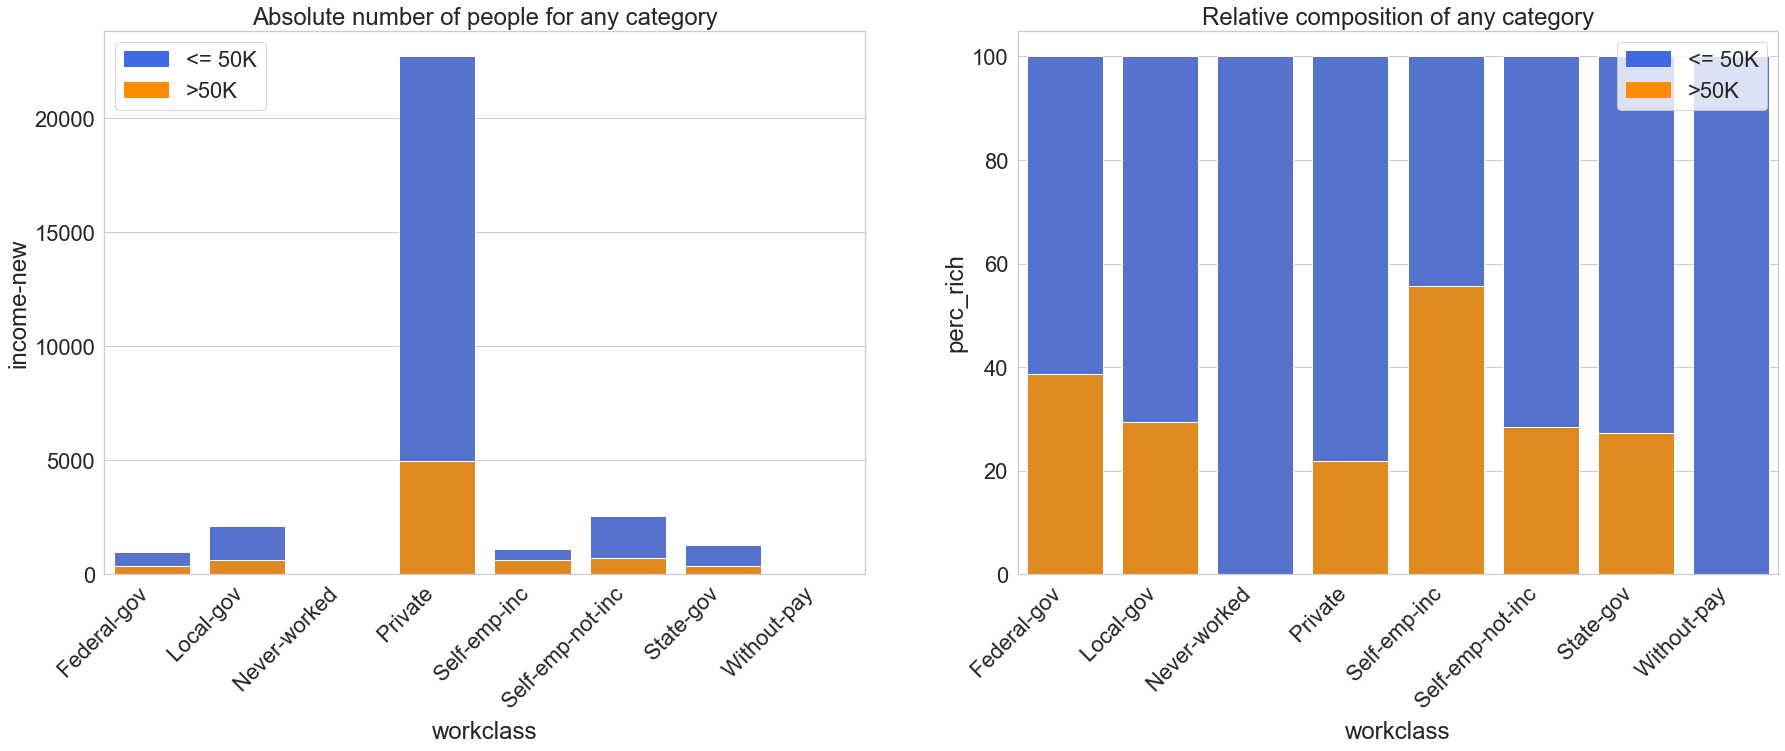

In [14]:
# WORKCLASS

my_countplot('workclass')


The most of the people in the survey belong to the private sector and so the data are highly biased. To understand in which way this data is related to the income column, let us analyze the bins. We see that the private sector, that employes most of the people in the survey, has an overwhelming majority of people who earn less than 50K. This is probably related to the bias in our data. 

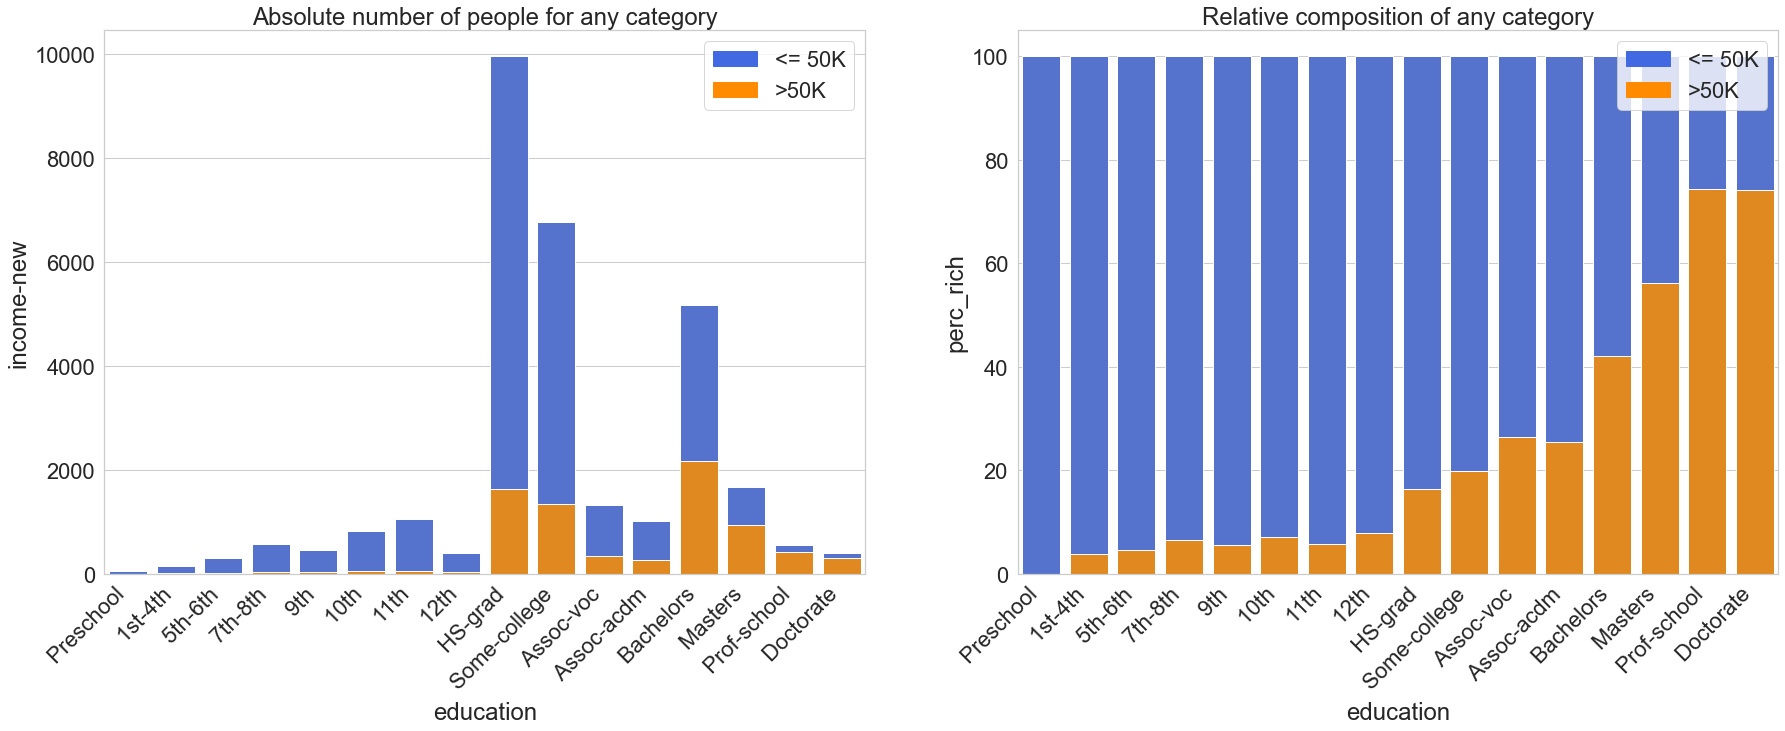

In [15]:
# EDUCATION ==========================================================

# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in df[['educ-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[x] = y
    
# ordered list of considered degree levels 
feature_order = [edu_level[n] for n in range(1,len(edu_level.keys()) +1)]

# the plot
my_countplot('education', order_list = feature_order)

The last plot is absolutely not comprehensible. However, it seems that the income increases when the education level increases.  Let us deepen the issue by grouping together some features.

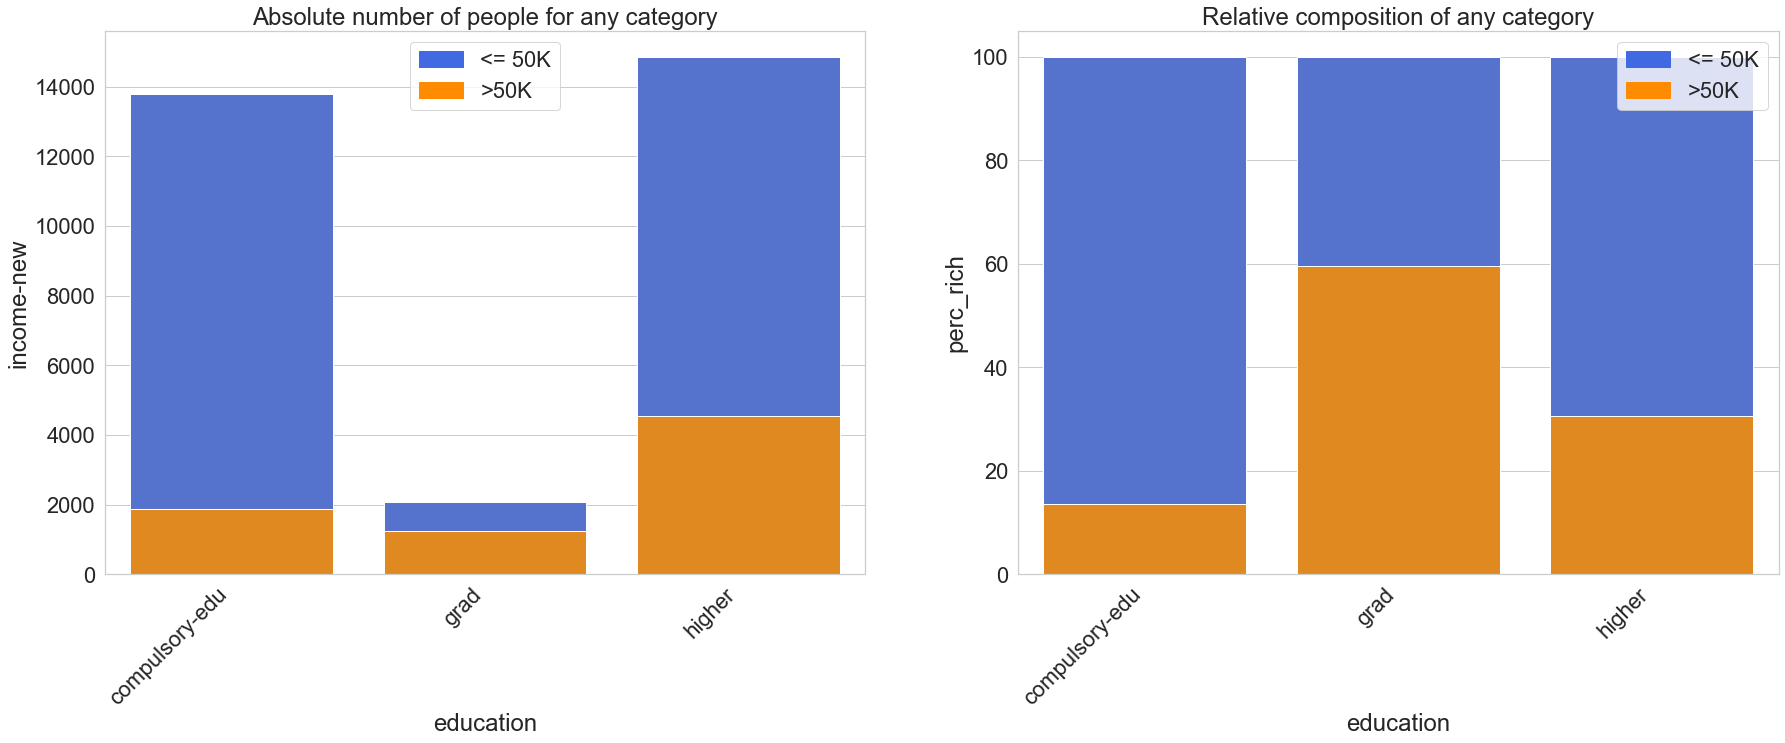

In [16]:
df["education"] = df["education"].replace(to_replace = [" Preschool", " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th", " 12th"," HS-grad"], value = "compulsory-edu" )
df["education"] = df["education"].replace(to_replace = [" Assoc-voc", " Assoc-acdm", " Prof-school"," Some-college"," Bachelors"], value = "higher")
df["education"] = df["education"].replace(to_replace = [" Masters", " Doctorate"], value = "grad")
my_countplot('education')

From the graph it is clear that attending grad school increases enormusly the chances to get an higher emolument.

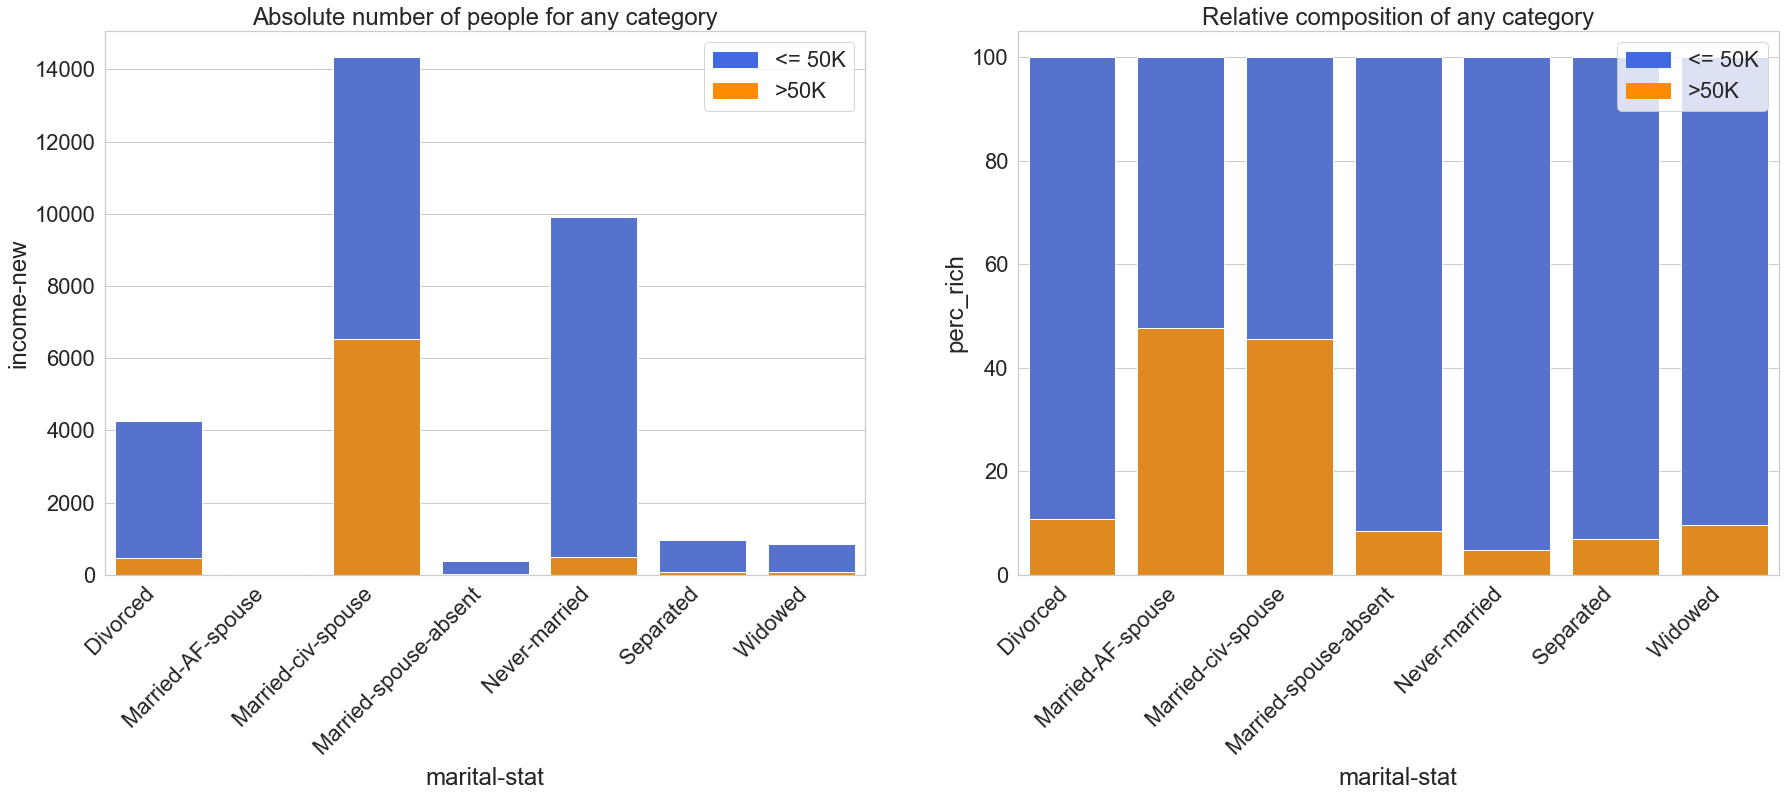

In [17]:
my_countplot('marital-stat')

We see that when a person is married and has a civilian spouce, they tend to have similar classses of income potential. The biggest difference is among the people who have never been married. This may be because they are relatively younger.

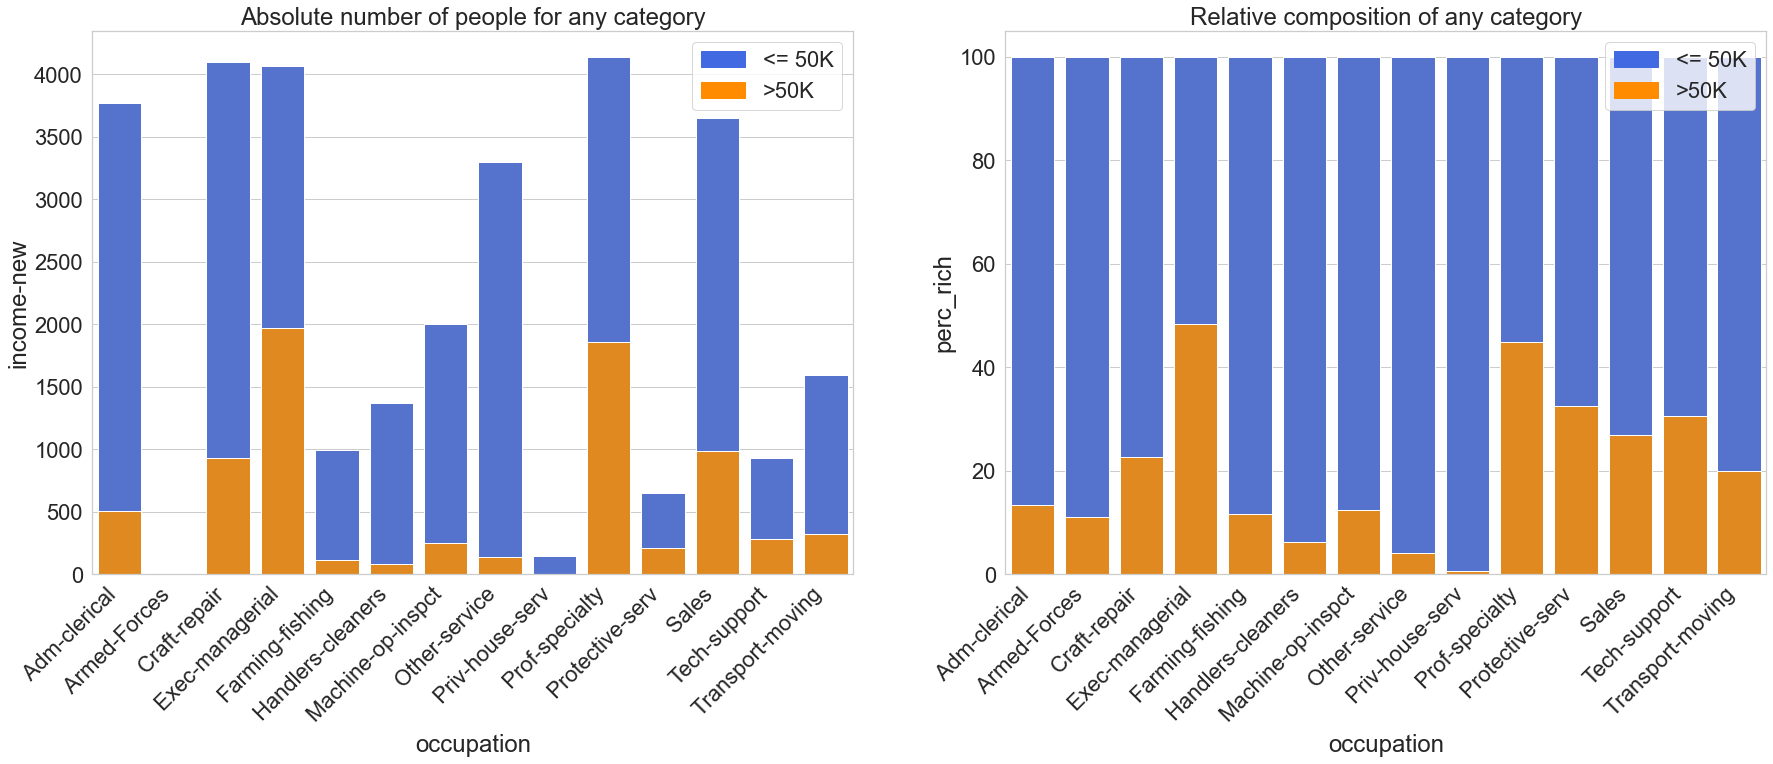

In [18]:
my_countplot('occupation')

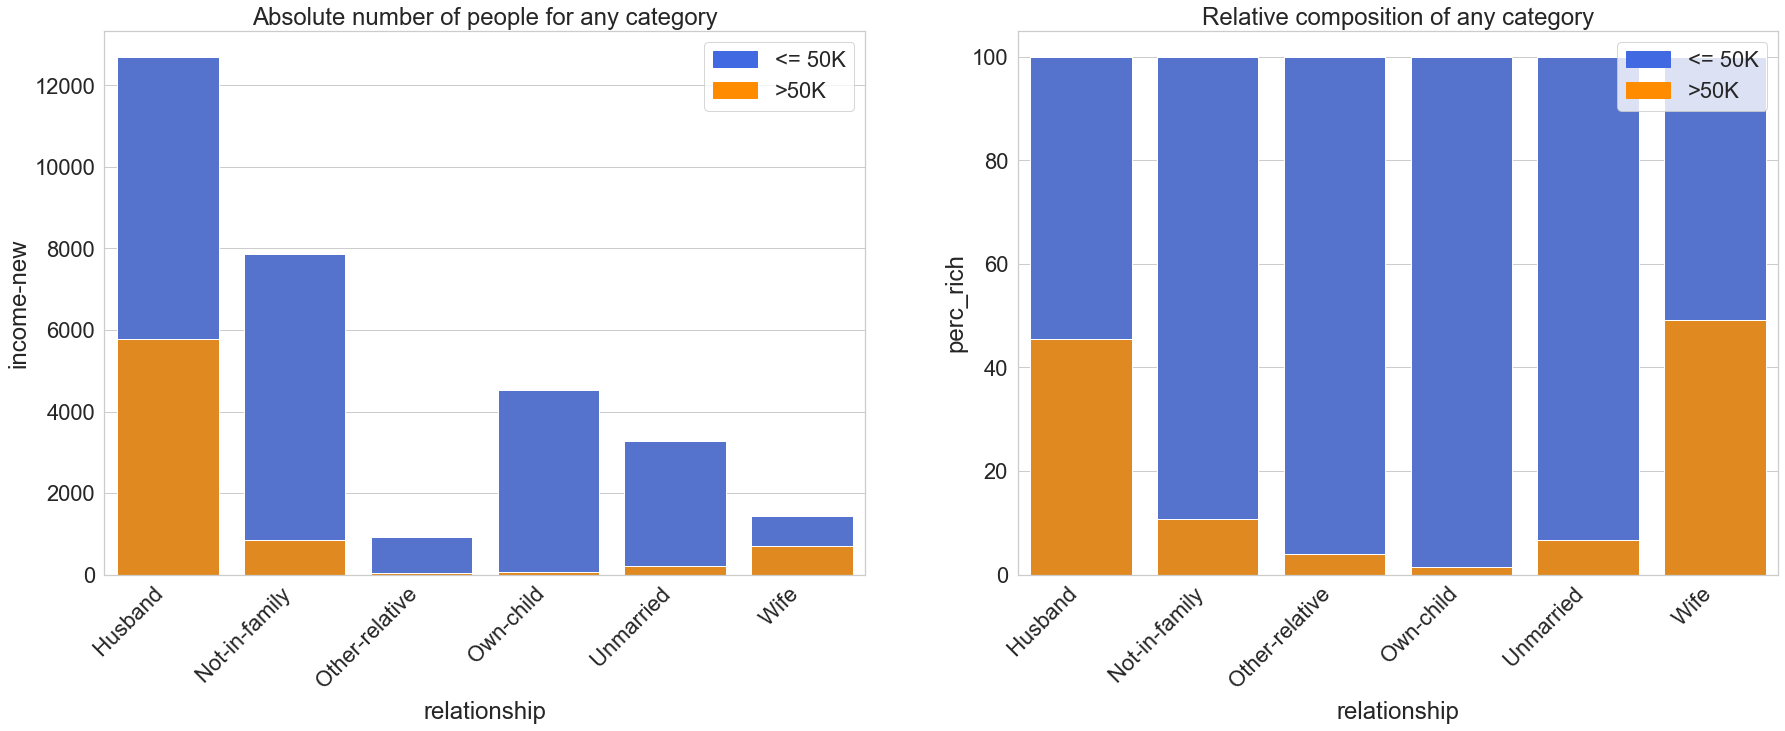

In [19]:
my_countplot('relationship')

As one can expect from the previous analysis, people with husband and wife (namely people with a family) have higher incomes.

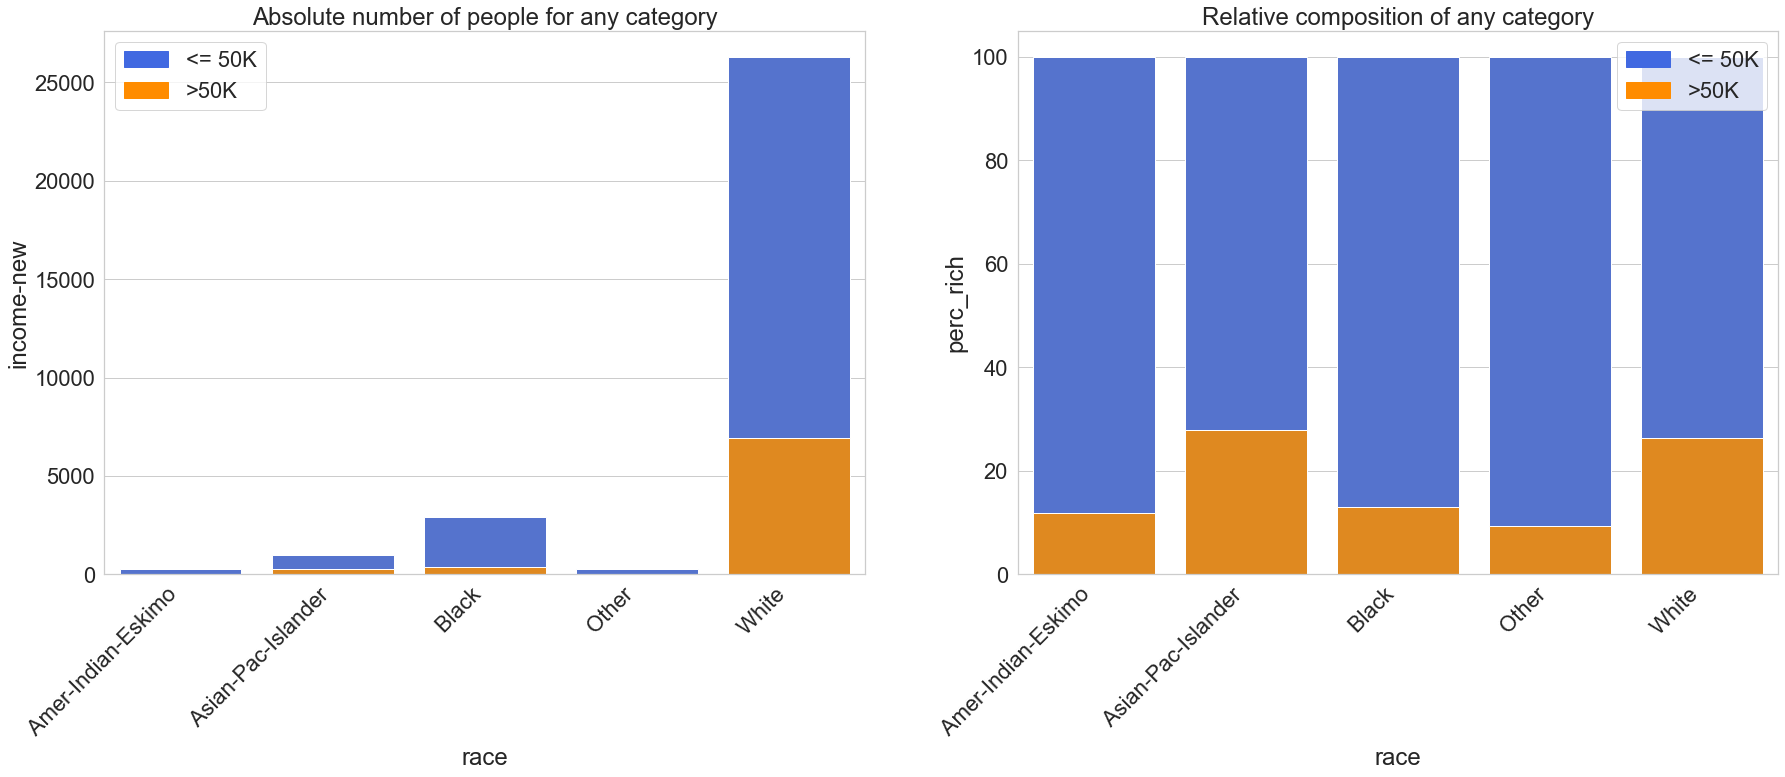

In [20]:
my_countplot('race')

This plot shows that the data is particularly biased on white people.

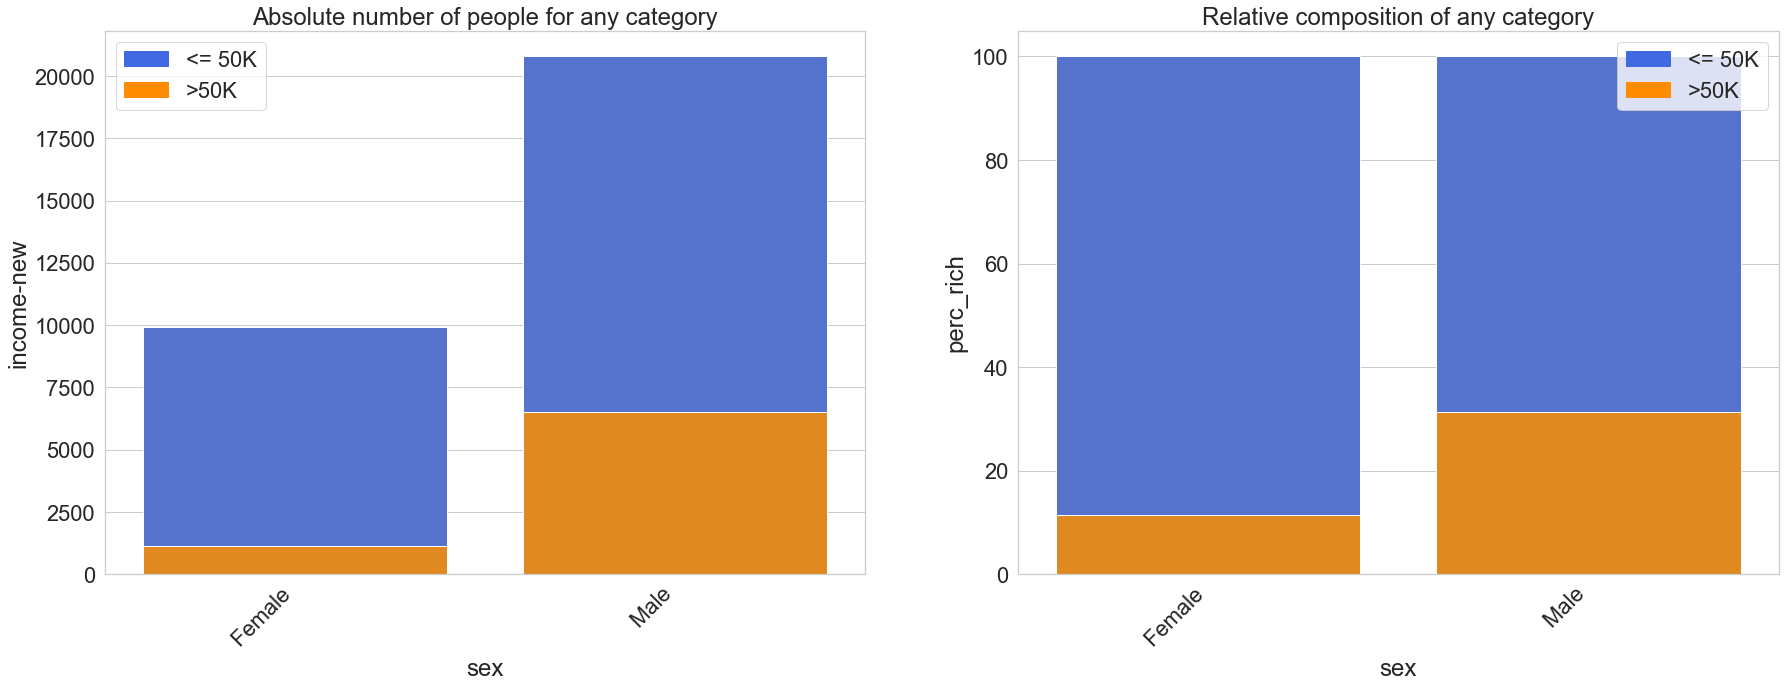

In [21]:
my_countplot('sex')

In [22]:
df.groupby(['sex', 'income']).size()

sex      income
 Female   <=50K     8803
          >50K      1127
 Male     <=50K    14265
          >50K      6523
dtype: int64

We see that when it comes to the ratio of Males being paid >50k and <-50k is around 2.3 but for women, the same ratio drops down to 8.1. This implies that women are being paid less.

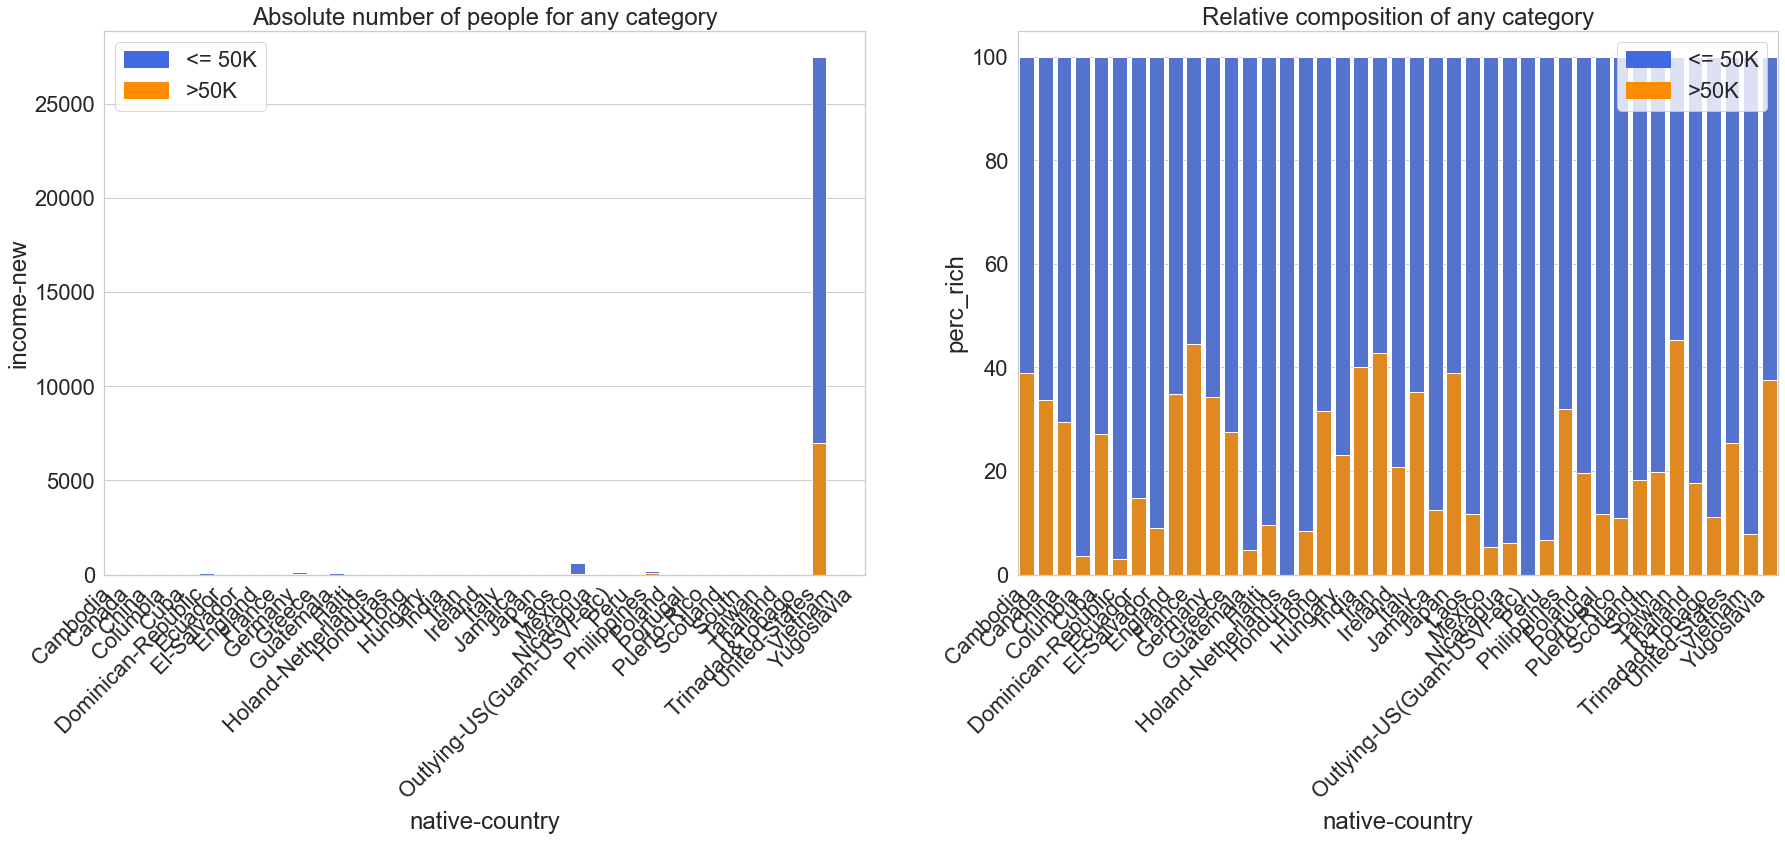

In [23]:
my_countplot('native-country')

The last plot is absolutely not comprehensible. However, it seems that most of the sample is localized in the USA. Let us deepen the issue by grouping american citizens by non american citizens. 

In [24]:
#list of all the unique values in the column
countries = list(df["native-country"].unique())

#function to recode the country into "Not USA"/"USA"
def recode_country(country):
    if country != " United-States":
        return "Not USA"
    else:
        return "USA"

#translation of the values in the column
df["native-country-new"] = df["native-country"].apply(recode_country)

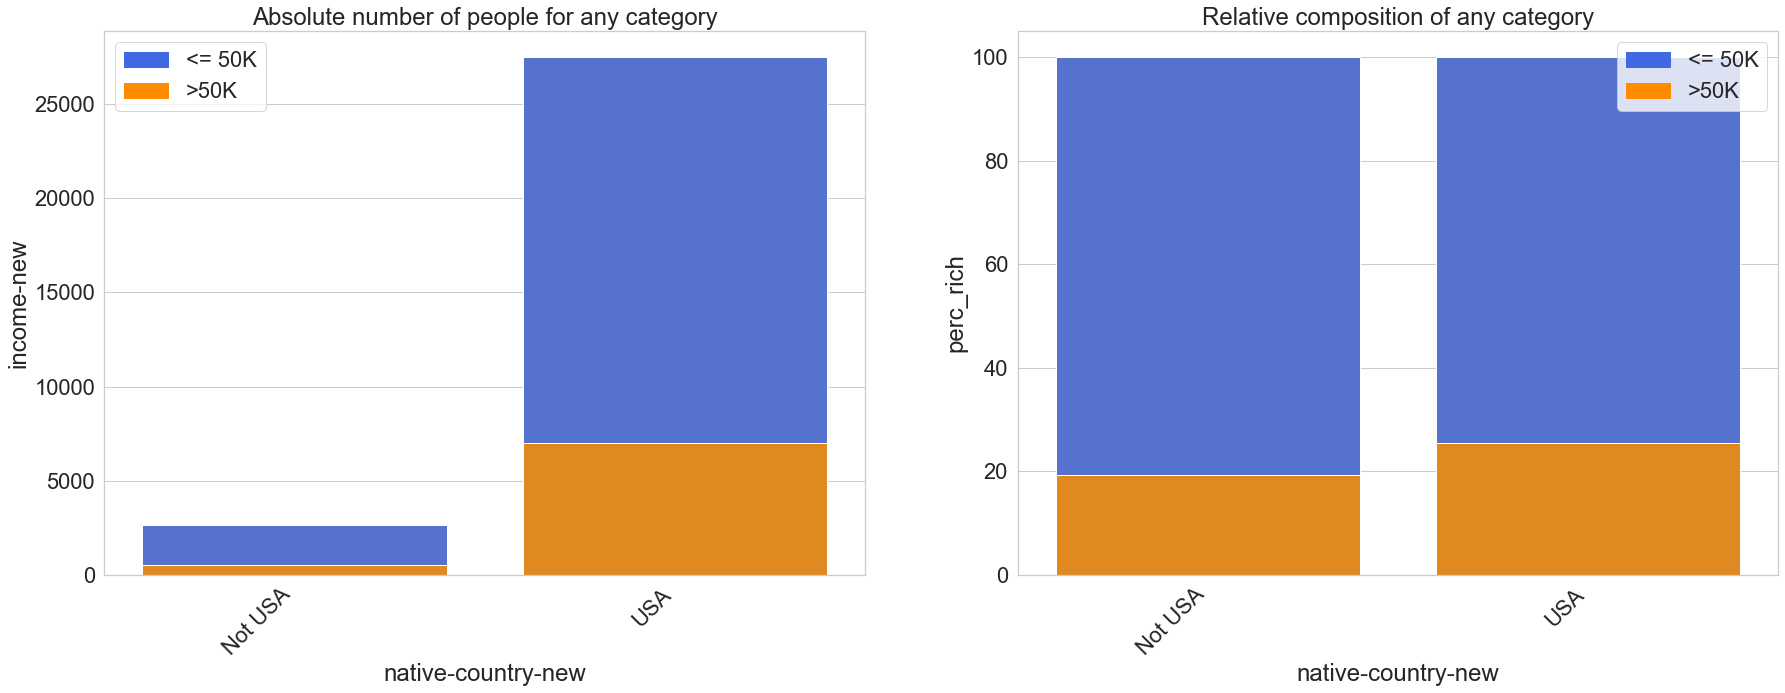

In [25]:
my_countplot('native-country-new')

df.groupby(['native-country-new', 'income']).size()The data are highly biased on american people. Let's check the percentage of people earning more or less than 50000 dollars a year in the two bins.

In [26]:
df.groupby(['native-country-new', 'income']).size()

native-country-new  income
Not USA              <=50K     2145
                     >50K       513
USA                  <=50K    20509
                     >50K      6995
dtype: int64

In [27]:
#percentage of earning potential >50K in the USA
df_usa = df[df['native-country-new'] == "USA" ]
num_50_plus_usa = len(df_usa[df_usa["income"] == " >50K"])
percentage_usa = round(100 * num_50_plus_usa/ len(df_usa),2)


#percentage of earning potential >50K NOT in the USA
df_not_usa = df[df['native-country-new'] == "Not USA" ]
num_50_plus_not_usa = len(df_not_usa[df_not_usa["income"] == " >50K"])
percentage_not_usa = round(100 * num_50_plus_not_usa/ len(df_not_usa),2)

#message to print
print(f"The percentage of people with a >50K earning potential in the USA is {percentage_usa}%.")
print(f"The percentage of people with a >50K earning potential outside the USA is {percentage_not_usa}%.")

The percentage of people with a >50K earning potential in the USA is 25.43%.
The percentage of people with a >50K earning potential outside the USA is 19.3%.


### Numerical Column Analysis

In [28]:
# Let us first get a first description of the numeric columns
df.describe()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,income-new,rich
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.0,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,1.0,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.0,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,1.0,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,1.0,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,1.0,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,1.0,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.0,1.000000


The data in capital-gain and capital-loss is vastly spread out with a high variance. Considering the row 25%m 50% and 75%, we deduce that this is caused by the presence of extreme values which are 0 in a lot of rows. The age mean (plus and minus the standard deviation) show us that we are dealing mostly with people with a family to take care of. 

In [29]:
#study correlation
df.corr()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,income-new,rich
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,NaN,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,NaN,-0.008957
educ-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,NaN,0.335286
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,NaN,0.221196
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,NaN,0.150053
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,NaN,0.229480
income-new,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rich,0.241998,-0.008957,0.335286,0.221196,0.150053,0.229480,NaN,1.000000


We see that we see no direct strong corelation between any of the data. 

In [30]:
#get the variance of the numeric columns
num_columns = df.select_dtypes(include = "int64").columns.to_list()
print(f"{'column' : <15}| {'variance'}")
print("-----------------------------------")
for column in num_columns:
    print(f"{column : <15}| {round(df[column].var(),2)}")

column         | variance
-----------------------------------
age            | 172.52
fnlwgt         | 11162550392.81
educ-num       | 6.5
capital-gain   | 54853968.43
capital-loss   | 163457.17
hours-per-week | 143.52
income-new     | 0.0
rich           | 0.19


We see that fnlwgt, capital-gain and capital-loss have the highest variance. Let us check the distribution of the variables: before, let us define a tool which will simply our plotting. 

In [31]:
sns.set_theme(style = "whitegrid", font_scale = 2)
def my_barplot(variable):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(15,10))

    # assigning a graph to each ax
    sns.boxplot(data=df, x=variable,  ax=ax_box)
    sns.histplot(data=df, x=variable, ax=ax_hist, kde=True)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

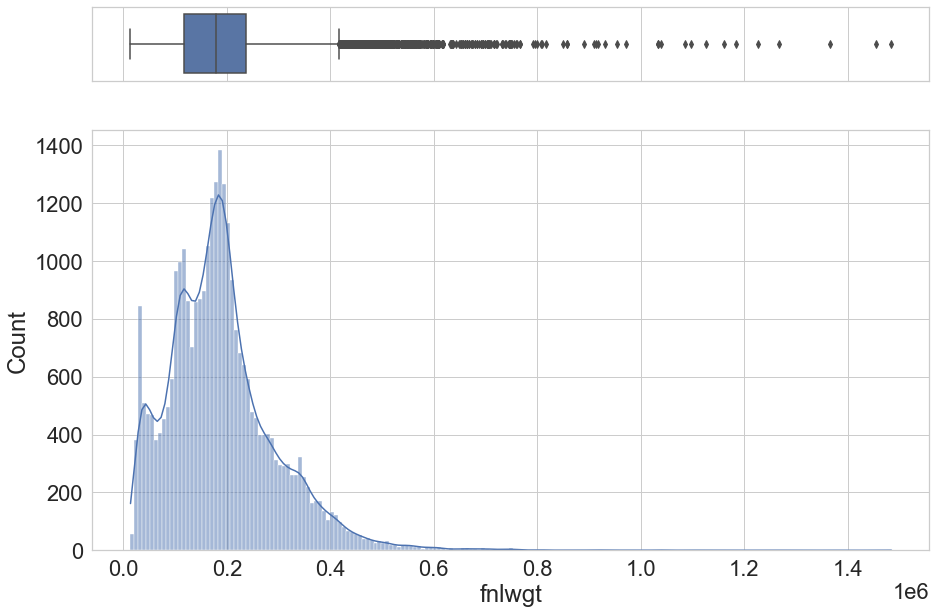

In [32]:
my_barplot("fnlwgt")


Note that the scale on axis x is correct by 1e6, that is a factor of 10^6 (so that the 0.2 step is actually 200.000). Further, the boxplot shows that we have a great number of outliers after 400.000. 

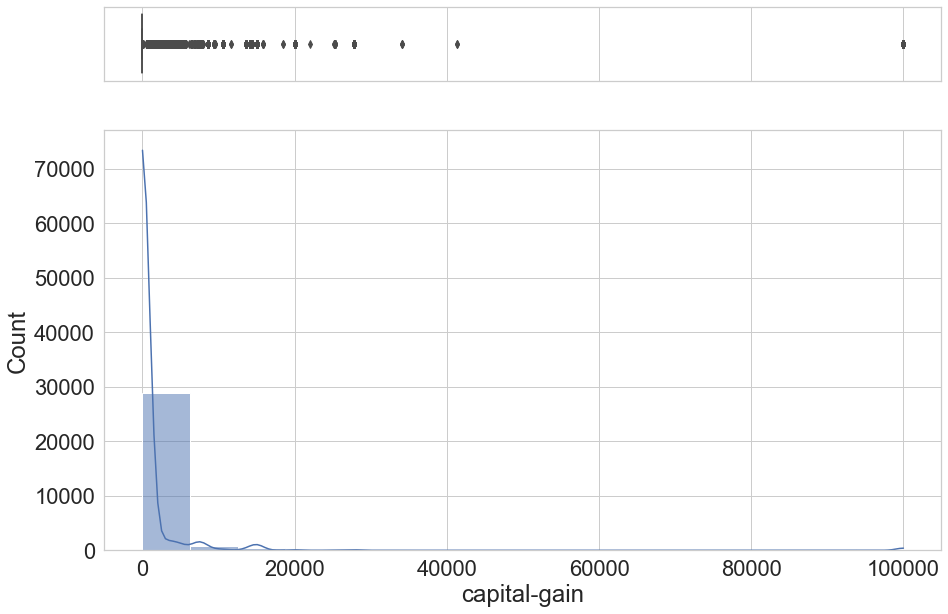

In [33]:
my_barplot("capital-gain")



This graph shows two main accumulation point of the data: around 0 and around 100.000. 

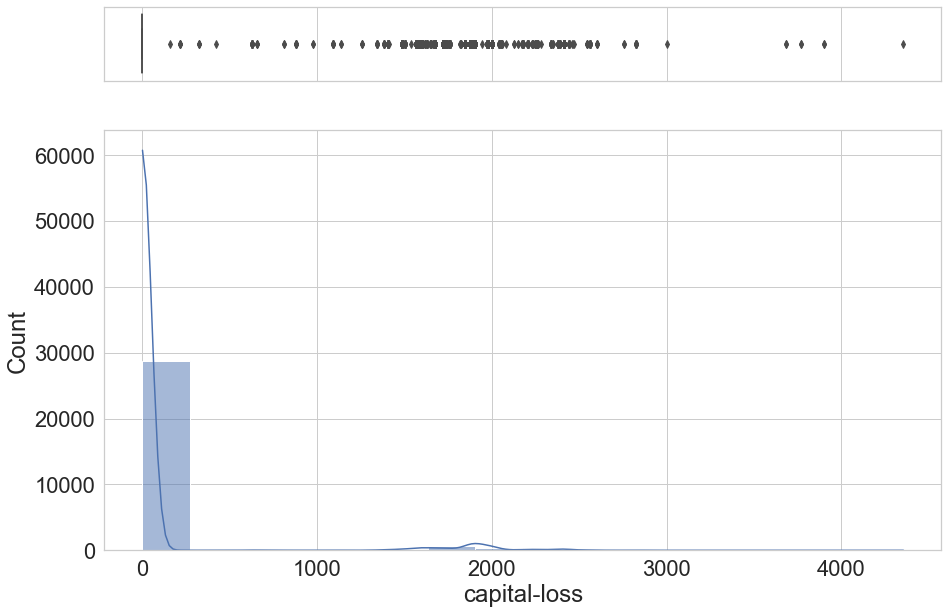

In [34]:
my_barplot("capital-loss")



Again, there are a large amount of people with no capital loss. We also saw a large amount of people do not have any capital gain either. So maybe people in our sample do not invest or have passive income or take risks and so on.

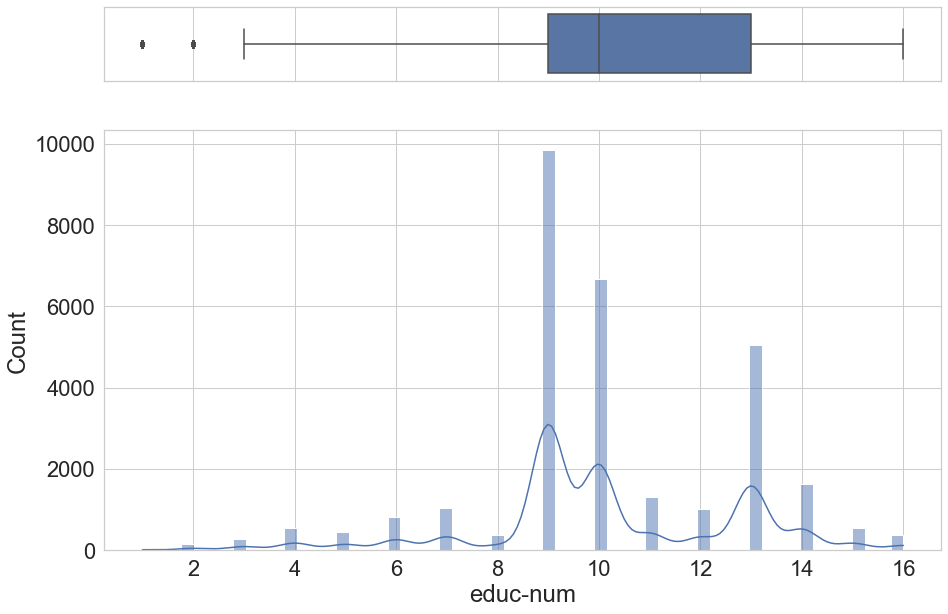

In [35]:
my_barplot("educ-num")



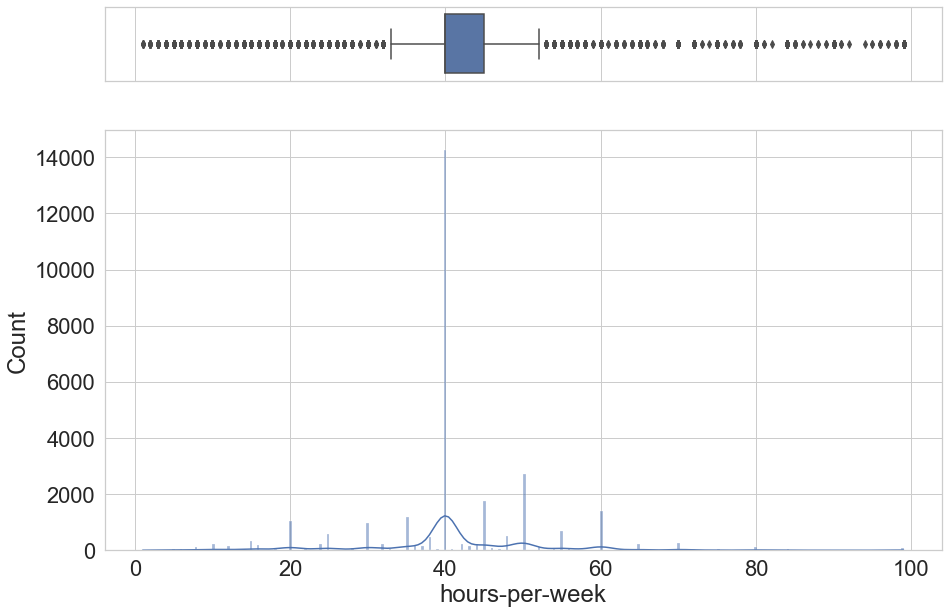

In [36]:
my_barplot("hours-per-week")

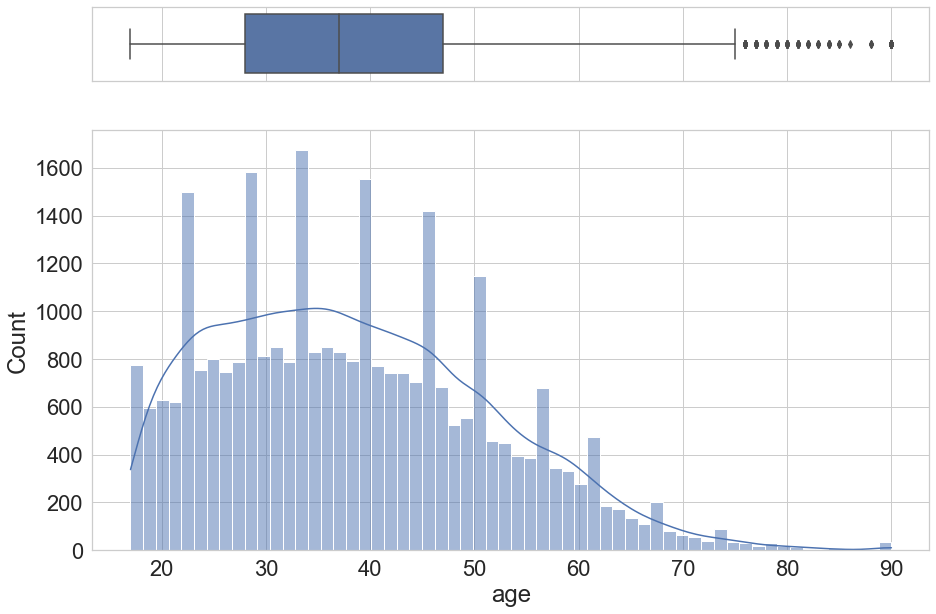

In [37]:
my_barplot("age")